In [1]:
PATH = unicode('C:/Users/zero/Google 云端硬盘/useful tools/BGO_', 'utf-8')
PRIOR_FILENAME = unicode('{} prior.csv'.format('黑狗UP'), 'utf-8')
KEY_POOL_CARD = {
    'UP池': ['库·丘林[Alter]', '托马斯·爱迪生']
}
def FLTR(fn):
    return True#dt.datetime(2017, 6, 21) < dt.datetime.utcnow().strptime(fn, RECORD_FILENAME) < dt.datetime(2017, 6, 22)

RECORD_FILENAME = 'UTC %Y %m %d %H %M %S.csv'
FONT_FAMILY = 'Microsoft YaHei'

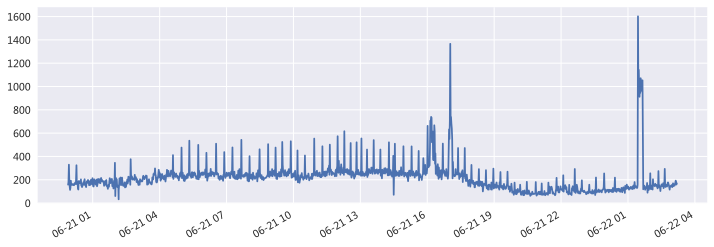

In [2]:
from __future__ import division
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import collections as co
import matplotlib as mpl
import operator as op
import datetime as dt
import numpy as np
import os

%config InlineBackend.figure_format='svg'
%matplotlib inline

mpl.rc('font', family=FONT_FAMILY)

fs = sorted(filter(FLTR, os.listdir(PATH)))
df = pd.concat(map(lambda fn: pd.read_csv(os.path.join(PATH, fn)), fs)).drop_duplicates().reset_index(drop=True)
def plt_date(x, y):
    plt.figure(figsize=(12,4))
    plt.plot_date(mpl.dates.date2num(x), y, ls='-', marker=None)
    plt.ylim(ymin=0)
    plt.gcf().autofmt_xdate()
    plt.show()
x, y = zip(*map(lambda fn: [dt.datetime.utcnow().strptime(fn, RECORD_FILENAME), min(pd.read_csv(os.path.join(PATH, fn))['id'])], fs))
plt_date(x[:-1], np.subtract(y[1:], y[:-1]))

In [3]:
# df = df[df['sname'] == 'ios服']

In [4]:
for c in ['sname', 'star']:
    print 'Group by {}({})'.format(c, df.shape[0])
    for k, d in df.groupby(c):
        print '\t{:0=5.2f}%\t{:5}\t{}'.format(d.shape[0] / df.shape[0] * 100, d.shape[0], k)

Group by sname(48794)
	33.35%	16271	ios服
	64.81%	31625	安卓bili服
	01.84%	  898	安卓联运服
Group by star(48794)
	75.86%	37013	SR
	24.14%	11781	SSR


In [5]:
for c in ['sname', 'star']:
    for k, d in df.groupby(c):
        print 'Group by {} = {}({})'.format(c, k, d.shape[0])
        d_ = dict(map(lambda (k, d): [k, d.shape[0]], d.groupby('info')))
        for k_ in sorted(d_, key=d_.get, reverse=True):
            print '\t{:0=5.2f}%\t{:5}\t{}'.format(d_[k_] / d.shape[0] * 100, d_[k_], k_)

Group by sname = ios服(16271)
	30.82%	 5014	托马斯·爱迪生
	17.60%	 2863	库·丘林[Alter]
	02.17%	  353	卡米拉
	02.14%	  348	玉藻猫
	02.13%	  347	骑士迪昂
	02.13%	  346	卫宫〔Assassin〕
	02.13%	  346	玛尔达
	02.07%	  337	赫拉克勒斯
	02.00%	  325	芬恩·麦克库尔
	02.00%	  325	斯忒诺
	01.99%	  324	齐格飞
	01.95%	  318	弗兰肯斯坦
	01.94%	  316	玛丽·安托瓦内特
	01.89%	  308	伊丽莎白·巴托里
	01.88%	  306	卫宫
	01.87%	  304	童谣
	01.86%	  302	贝奥武夫
	01.76%	  286	阿塔兰忒
	01.74%	  283	罗摩
	01.65%	  269	阿斯托尔福
	01.65%	  269	安妮·伯妮＆玛莉·瑞德
	01.63%	  266	海伦娜·布拉瓦茨基
	01.56%	  254	兰斯洛特
	00.97%	  158	迦尔纳
	00.92%	  149	弗拉德三世
	00.84%	  137	玉藻前
	00.84%	  137	莫德雷德
	00.83%	  135	俄里翁
	00.80%	  130	南丁格尔
	00.79%	  129	贞德
	00.76%	  124	阿周那
	00.71%	  115	开膛手杰克
	00.69%	  113	阿蒂拉
	00.69%	  113	弗朗西斯·德雷克
	00.68%	  111	阿尔托莉雅·潘德拉贡
	00.66%	  107	诸葛孔明〔埃尔梅罗Ⅱ世〕
	00.39%	   63	阿尔托莉雅·潘德拉贡〔Alter〕
	00.21%	   34	尼禄·克劳狄乌斯
	00.20%	   33	美狄亚〔Lily〕
	00.19%	   31	李书文
	00.17%	   28	尼古拉·特斯拉
	00.09%	   15	女王梅芙
Group by sname = 安卓bili服(31625)
	23.24%	 7350	托马斯·爱迪生
	13.58%	 4296	库·丘林[Alter]
	03.96%	 1253	伊丽莎白·巴托里


In [6]:
prior = pd.read_csv(PRIOR_FILENAME)
i2c = prior['info']
c2i = dict(zip(i2c, range(len(i2c))))
c2s = dict(df.drop_duplicates('info')[['info', 'star']].values)
i2s = np.array(map(c2s.get, i2c))
pn = prior.drop(['info'], axis=1)
i2pn = pn.columns
pn2i = dict(zip(i2pn, range(len(i2pn))))
cnt = np.array(zip(*sorted(co.Counter(map(c2i.get, df['info'])).iteritems()))[1])
pd.merge(prior, pd.DataFrame({'info': i2c, '实际出货': cnt / cnt.sum()}))

,info,初始十连,UP池,-1章剧情池,0~1章剧情池,2章剧情池,3章剧情池,4章剧情池,5~章剧情池,实际出货
0,赫拉克勒斯,0.1,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778,0.033426
1,库·丘林[Alter],0.0,0.162500,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.148358
2,童谣,0.0,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778,0.015617
3,齐格飞,0.1,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778,0.030660
4,伊丽莎白·巴托里,0.1,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778,0.032955
5,李书文,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.001763
6,诸葛孔明〔埃尔梅罗Ⅱ世〕,0.0,0.006731,0.019231,0.019231,0.019231,0.019231,0.017857,0.015625,0.006189
7,卡米拉,0.1,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778,0.033262
8,阿斯托尔福,0.0,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778,0.014141
9,弗兰肯斯坦,0.0,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778,0.015453


In [7]:
alpha = pn.values.copy()
alpha /= map(lambda a: a[a != 0].min(), alpha.T)
alpha = alpha.T
beta = np.ones(alpha.shape[0])

In [8]:
%%time
def CGS(n, alpha, beta, cnt):
    np.random.seed(0)
    thetas, pis = [], []
    da, db = 0, 0
    for _ in range(n):
        thetas.append(np.array(map(np.random.dirichlet, alpha + da)))
        pis.append(np.random.dirichlet(beta + db))
        da = (thetas[-1].T * pis[-1]).T
        da /= da.sum(axis=0)
        da *= cnt
        db = da.sum(axis=1)
    return thetas, pis
thetas, pis = CGS(100000, alpha, beta, cnt)

Wall time: 9.1 s


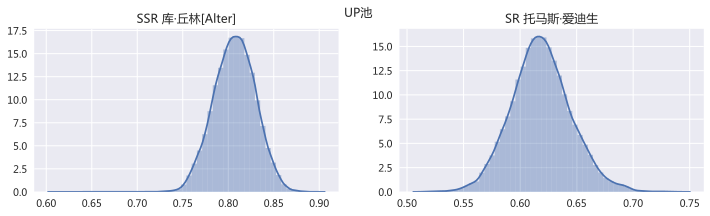

In [9]:
for p in KEY_POOL_CARD:
    plt.figure(figsize=(12, 3))
    plt.suptitle(unicode('{}'.format(p), 'utf-8'))
    for c in KEY_POOL_CARD[p]:
        plt.subplot(1, len(KEY_POOL_CARD[p]), KEY_POOL_CARD[p].index(c) + 1)
        plt.title(unicode('{} {}'.format(c2s[c], c), 'utf-8'))
        sb.distplot(map(lambda t: t[pn2i[p], c2i[c]] / sum(t[pn2i[p], i2s == c2s[c]]), thetas))
plt.show()

In [10]:
print '最小二乘法拟合分布', ''.join(map(lambda p: '\t{:.2f}%'.format(p * 100), np.linalg.lstsq(pn.values, cnt / cnt.sum())[0]))
theta, pi = map(lambda v: np.mean(v, axis=0), [thetas, pis])
posterior = reduce(pd.merge, map(lambda pn: pd.DataFrame({'info': i2c, pn: theta[pn2i[pn]]}), i2pn))
reduce(pd.merge, map(lambda pn: pd.DataFrame({'info': i2c, '{}({:.2f}%)'.format(pn, pi[pn2i[pn]] * 100): theta[pn2i[pn]]}), i2pn))

最小二乘法拟合分布 	17.98%	53.98%	24.79%	-7.66%	0.44%	-8.37%	-24.05%	41.13%


,info,初始十连(15.96%),UP池(59.62%),-1章剧情池(8.33%),0~1章剧情池(5.59%),2章剧情池(2.38%),3章剧情池(1.75%),4章剧情池(1.70%),5~章剧情池(4.67%)
0,赫拉克勒斯,0.104877,0.013435,0.037985,0.036835,0.033542,0.031957,0.030648,0.028605
1,库·丘林[Alter],0.000000,0.247302,0.000000,0.000000,0.000000,0.000000,0.000000,0.016601
2,童谣,0.000000,0.012222,0.036544,0.035230,0.033693,0.031998,0.030450,0.029308
3,齐格飞,0.088951,0.013179,0.038797,0.035994,0.033154,0.032366,0.030777,0.028510
4,伊丽莎白·巴托里,0.098478,0.014481,0.038425,0.036419,0.033880,0.032337,0.030821,0.028419
5,李书文,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039604
6,诸葛孔明〔埃尔梅罗Ⅱ世〕,0.000000,0.003759,0.016205,0.016994,0.018562,0.018604,0.017541,0.014550
7,卡米拉,0.101878,0.013826,0.037956,0.037266,0.034701,0.031898,0.031031,0.028962
8,阿斯托尔福,0.000000,0.010190,0.035586,0.034179,0.032787,0.032258,0.031275,0.027336
9,弗兰肯斯坦,0.000000,0.011942,0.037342,0.034936,0.033171,0.031523,0.030919,0.028684


posterior.set_index('info') / prior.set_index('info') - 1

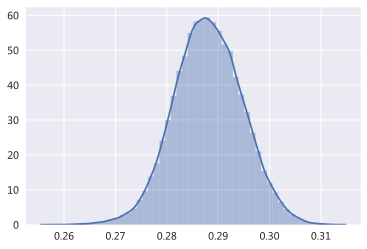

In [11]:
col = np.array(map(lambda n: '初始' not in n, pn.columns))
sb.distplot(map(lambda t: np.average(t[col][:, i2s == 'SSR'].sum(axis=1), weights=pi[col]), thetas))
plt.show()